## Exploratory Data Analysis

### Extract and load the dataset

In [1]:
import os
import sys

# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

# Import the load_data function from your custom module
from data_processing import load_data 


# Define paths
zip_file_path = '../Data/raw_analyst_ratings.csv.zip'  # Path to the .zip file
extracted_folder_path = '../Data'  # Path where the files will be extracted

In [2]:
# Load the dataset to the dataframe
df = load_data(zip_file_path, 'raw_analyst_ratings.csv')

In [4]:
# explore the the first 5 rows
df.head(10)

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A
5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,2020-05-22 15:23:25+00:00,A
6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22 13:36:20+00:00,A
7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,2020-05-22 13:07:04+00:00,A
8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,2020-05-22 12:37:59+00:00,A
9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-05-22 12:06:17+00:00,A


In [5]:
# Check the size of the dataset
df.shape

(1407328, 5)

In [6]:
# checking missing values
df.isnull().sum()

headline     0
url          0
publisher    0
date         0
stock        0
dtype: int64

In [7]:
# check the data types
df.dtypes

headline                  object
url                       object
publisher                 object
date         datetime64[ns, UTC]
stock                     object
dtype: object

In [8]:
# check the uniqueness of the data
# Duplicate rows
print("\nDuplicate rows:")
df[df.duplicated()].reset_index()


Duplicate rows:


,index,headline,url,publisher,date,stock
0,562357,"Top Performing Industries For July 1, 2015",https://www.benzinga.com/news/15/07/5642290/to...,Lisa Levin,2015-07-01 00:00:00+00:00,GME


In [10]:
# drop duplicated rows
df.drop_duplicates().reset_index(inplace=True)

## Descriptive Statistics

In [11]:
# import eda
import descriptive_analysis as da

# Descriptive statistics
print("Headline Length Statistics:")
print(da.headline_length_stats(df))

Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


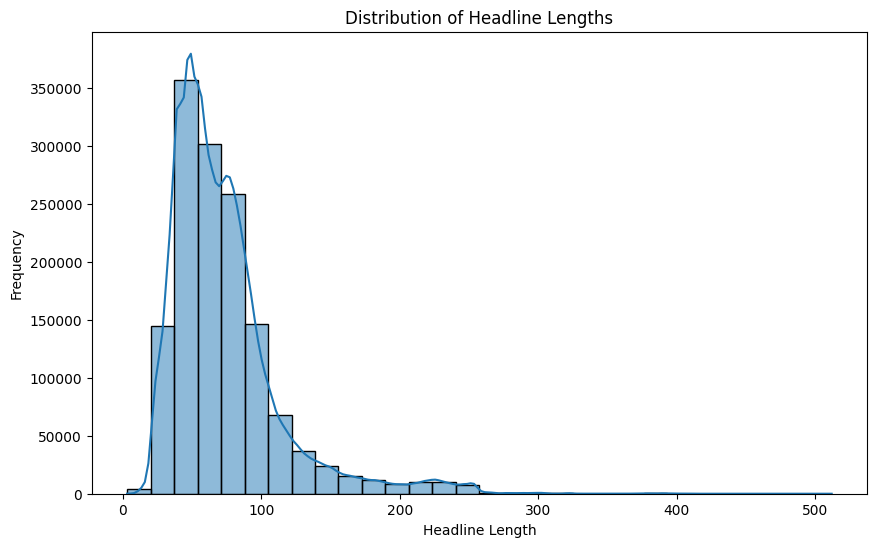

In [12]:
# Plot the distribution of headline lengths
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['headline_length'], bins=30, kde=True)
plt.title('Distribution of Headline Lengths')
plt.xlabel('Headline Length')
plt.ylabel('Frequency')
plt.show()

### Count the most active publishers

In [13]:
print("Top Publishers:")
publisher_counts = da.articles_per_publisher(df).reset_index(name="no_of_articles")
top_publisher = publisher_counts.head(15)
top_publisher

Top Publishers:


,publisher,no_of_articles
0,Paul Quintaro,228373
1,Lisa Levin,186979
2,Benzinga Newsdesk,150484
3,Charles Gross,96732
4,Monica Gerson,82380
5,Eddie Staley,57254
6,Hal Lindon,49047
7,ETF Professor,28489
8,Juan Lopez,28438
9,Benzinga Staff,28114


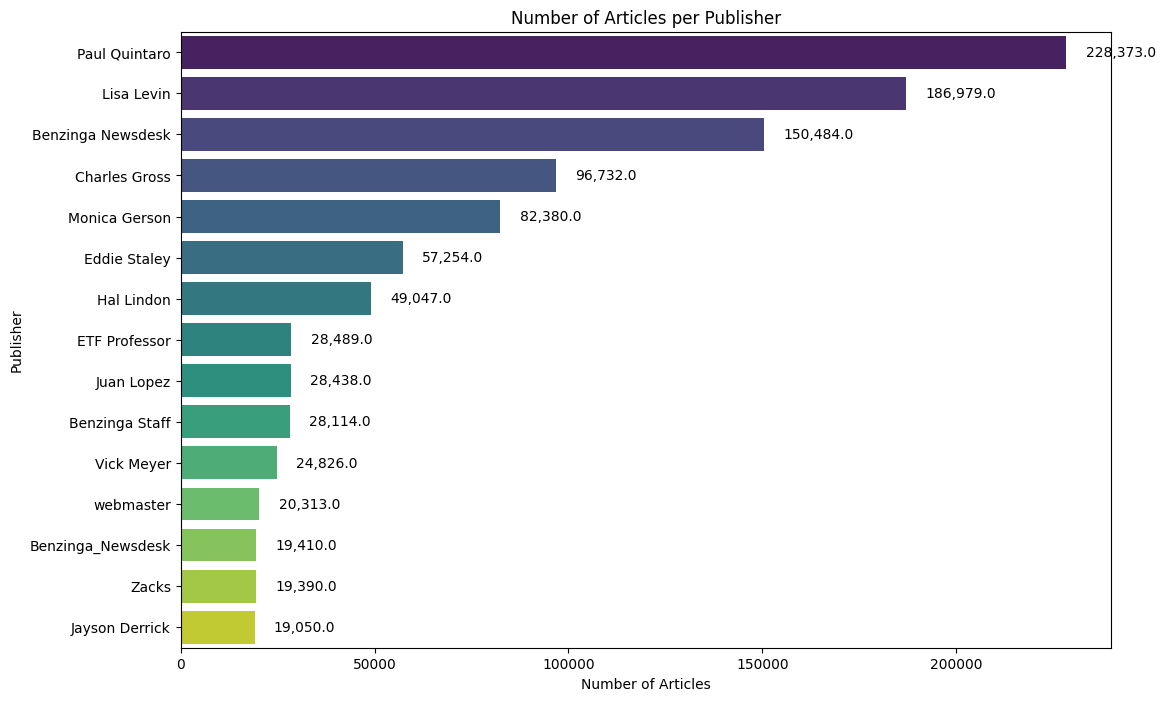

In [14]:
import matplotlib.pyplot as plt

# Plot the number of articles per publisher
# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))
bars = sns.barplot(x='no_of_articles', y='publisher', 
                   data=top_publisher, 
                   palette='viridis',
                   hue='publisher',
                   ax=ax)

# Add exact numbers at the end of each bar
for bar in bars.patches:
    width = bar.get_width()
    label = f'{width:,}'
    ax.text(width + 5000, bar.get_y() + bar.get_height() / 2, label,
            ha='left', va='center', color='black', fontsize=10)

plt.title('Number of Articles per Publisher')
plt.xlabel('Number of Articles')
plt.ylabel('Publisher')
plt.show()


### Articles by day of weeks

In [15]:
# Articles by day of weeks
articles_by_day = da.articles_by_day_of_week(df).reset_index(name='no_of_articles')
articles_by_day

,day_of_week,no_of_articles
0,Thursday,302619
1,Wednesday,300922
2,Tuesday,296505
3,Monday,265139
4,Friday,217918
5,Sunday,16466
6,Saturday,7759


### Analyze and identify unique emails
- If email addresses are used as publisher names, identify unique domains to see if certain organizations contribute more frequently.




In [16]:
# identify unique emails
unique_domains = da.identify_unique_domains(df)
unique_domains.reset_index(drop=True)


,domain,count
0,benzinga.com,7937
1,gmail.com,139
2,andyswan.com,5
3,investdiva.com,2
4,tothetick.com,2
5,eosdetroit.io,1
6,forextraininggroup.com,1
7,stockmetrix.net,1


## Text Analysis(Sentiment analysis & Topic Modeling)

In [20]:
# Import the module
from sentiment_analysis import SentimentAnalyzer as sa

# Perform sentiment analysis on headline
sentiment_df = sa.analyze_sentiment(df['headline'])

# Apply sentiment categories (Positive, Neutral, Negative)
sentiment_df = sa.apply_sentiment_categories(sentiment_df)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\jenbe\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jenbe\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jenbe\AppData\Roaming\nltk_data...


In [21]:
# make the date as index and add stock column at the end
sentiment_df['Date'] = df['date'].dt.date
sentiment_df['stock'] = df['stock']
sentiment_df.set_index('Date', inplace=True)

In [22]:
# Display results
sentiment_df.head()

,headline,neg,neu,pos,compound,Sentiment,stock
Date,,,,,,,
2020-06-05,Stocks That Hit 52-Week Highs On Friday,0.0,1.000,0.000,0.000,Neutral,A
2020-06-03,Stocks That Hit 52-Week Highs On Wednesday,0.0,1.000,0.000,0.000,Neutral,A
2020-05-26,71 Biggest Movers From Friday,0.0,1.000,0.000,0.000,Neutral,A
2020-05-22,46 Stocks Moving In Friday's Mid-Day Session,0.0,1.000,0.000,0.000,Neutral,A
2020-05-22,B of A Securities Maintains Neutral on Agilent...,0.0,0.833,0.167,0.296,Positive,A


In [23]:
empty_headlines = sentiment_df[sentiment_df['headline'] == '']
print(f"Number of empty headlines: {len(empty_headlines)}")

Number of empty headlines: 0


In [24]:
missing_after_sentiment = sentiment_df[sentiment_df['headline'].isna()]
print(f"Number of missing headlines after sentiment analysis: {len(missing_after_sentiment)}")


Number of missing headlines after sentiment analysis: 6509


In [25]:
# Find rows with NaN in cleaned_headline
# Check the data types in the 'headline' column
print(sentiment_df['headline'].apply(type).value_counts())


headline
<class 'str'>      1407328
<class 'float'>       6509
Name: count, dtype: int64


In [26]:
# Drop rows where the 'headline' column has float values
sentiment_df = sentiment_df[sentiment_df['headline'].apply(lambda x: not isinstance(x, float))]


In [29]:
# Save the sentiment analysis result into csv for correlation analysis
# with stock market movements
sentiment_df.to_csv('../Data/sentiment.csv')

Sentiment Distribution of Headlines

Sentiment
Neutral     744222
Positive    439803
Negative    223303
Name: count, dtype: int64


C:\Windows\Temp\ipykernel_8600\1781788973.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage_text = f'{percentages[i]:.1f}%'


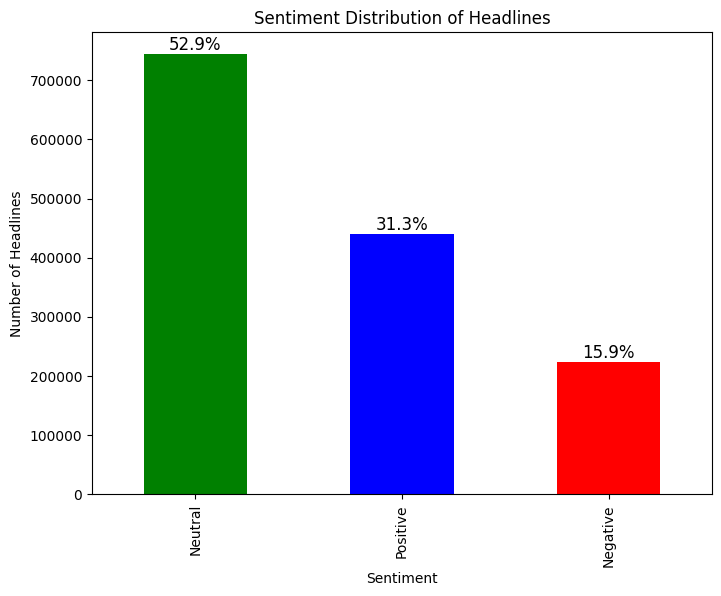

In [30]:
# Summary of sentiment distribution
sentiment_distribution = sentiment_df['Sentiment'].value_counts()
print(sentiment_distribution)

total = sentiment_distribution.sum()  # Calculate the total number of headlines
percentages = (sentiment_distribution / total) * 100  # Calculate percentages

# Optional: Plot the sentiment distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
bars = sentiment_distribution.plot(kind='bar', color=['green', 'blue', 'red'])

# Add percentage annotations on top of each bar
for i, bar in enumerate(bars.patches):
    # Get the height of the bar
    height = bar.get_height()
    # Calculate the percentage and format it
    percentage_text = f'{percentages[i]:.1f}%'
    # Position the text at the end of the bar
    plt.text(bar.get_x() + bar.get_width() / 2, height, percentage_text, 
             ha='center', va='bottom', fontsize=12)

# Set titles and labels
plt.title('Sentiment Distribution of Headlines')
plt.xlabel('Sentiment')
plt.ylabel('Number of Headlines')

# Display the plot
plt.show()



## Time Series Analysis

### Analzye annual or quartley trends 

d:\KMAI3\FNSPID\scripts\publication_analysis.py:19: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  annual_counts = data.groupby(data['date'].dt.to_period('Y')).size().reset_index(name='no_of_articles')
d:\KMAI3\FNSPID\scripts\publication_analysis.py:35: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  quarterly_counts = data.groupby(data['date'].dt.to_period('Q')).size().reset_index(name='no_of_articles')


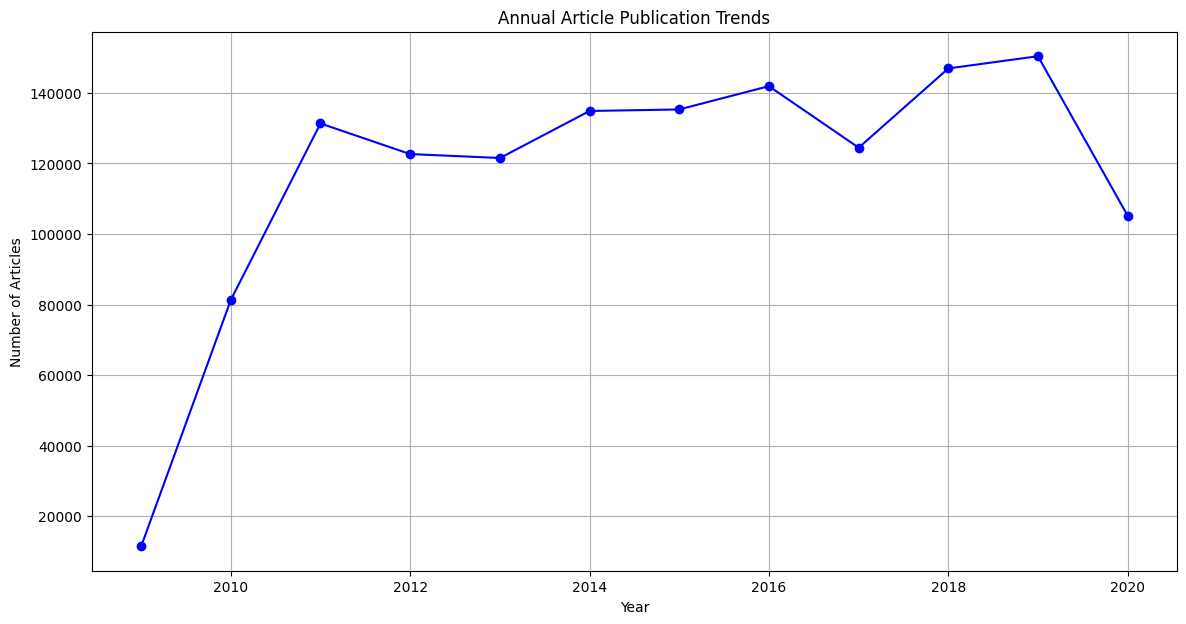

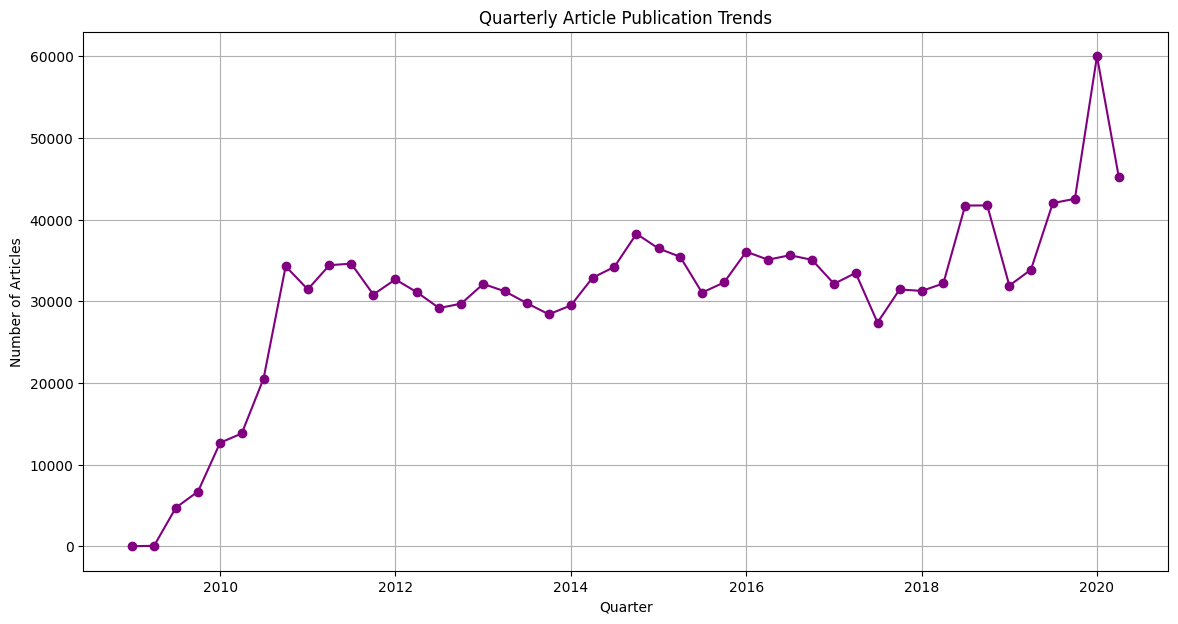

In [38]:
# Analyze annual and quarterly trends
from publication_analysis import *

annual_counts = analyze_annual_trends(df)
quarterly_counts = analyze_quarterly_trends(df)

# Plot the long-term trends
plot_long_term_trends(annual_counts, quarterly_counts)


### Decomposition 

In [39]:
# Decompose the time series to understand trends and seasonality
import statsmodels.api as sm

decomposed = sm.tsa.seasonal_decompose(annual_counts['no_of_articles'], model='additive', period=6)


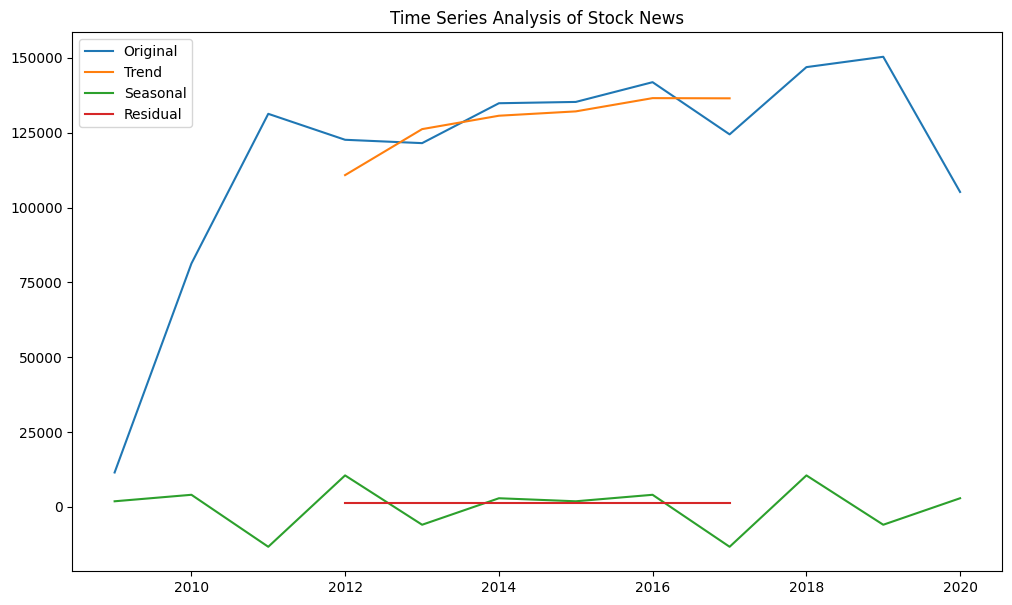

In [40]:
plt.figure(figsize=(12, 7))
# plot the original data
plt.plot(annual_counts['date'], annual_counts['no_of_articles'], label='Original')
# plot the trend
plt.plot(annual_counts['date'], decomposed.trend, label='Trend')
# plot the seasonal
plt.plot(annual_counts['date'], decomposed.seasonal, label='Seasonal')
# plot residual
plt.plot(annual_counts['date'], decomposed.resid, label='Residual')
plt.title('Time Series Analysis of Stock News')
plt.legend()
plt.show()